In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset
License(s): CC0-1.0
 87%|██████████████████████████████████▉     | 129M/148M [00:01<00:00, 88.3MB/s]
100%|████████████████████████████████████████| 148M/148M [00:01<00:00, 87.7MB/s]


In [3]:
import zipfile

# Path to the downloaded zip file
local_zip = '/kaggle/working/cotton-disease-dataset.zip'

# Directory where the dataset will be extracted
extract_dir = '/kaggle/working/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")

Dataset extracted to /kaggle/working/


In [25]:

train_path='/kaggle/working/Cotton Disease/train'
val_path='/kaggle/working/Cotton Disease/test'


In [26]:
from keras.applications.vgg16 import VGG16
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Model

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/kaggle/working/Cotton Disease/train',
                                                 target_size=(242, 242),
                                                 batch_size=32,
                                                 class_mode='categorical')

validation_set = test_datagen.flow_from_directory('/kaggle/working/Cotton Disease/test',
                                                  target_size=(242, 242),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [28]:
# Fine-tune Vgg16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(242, 242, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:

for layer in base_model.layers:
    layer.trainable = False

In [30]:
  # useful for getting number of output classes
folders = glob('/kaggle/working/Cotton Disease/train')

In [31]:

# our layers - you can add more if you want
x = Flatten()(base_model.output)

In [32]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

In [33]:
num_classes = 4
prediction = Dense(num_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=base_model.input, outputs=prediction)

In [34]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 242, 242, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 242, 242, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 242, 242, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 121, 121, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 121, 121, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 121, 121, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,244,100 (58.15 MB)

 Trainable params: 529,412 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Callbacks for learning rate scheduling and early stopping
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [37]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
# Train the model
history = model.fit(training_set,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_set,
                    validation_steps=50)

Epoch 1/10
 23/100 ━━━━━━━━━━━━━━━━━━━━ 45s 586ms/step - accuracy: 0.4706 - loss: 1.2444

W0000 00:00:1721938903.253141     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 355ms/step - accuracy: 0.6402 - loss: 0.8899 - val_accuracy: 0.8208 - val_loss: 3663.8730
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 345ms/step - accuracy: 0.8497 - loss: 0.4028 - val_accuracy: 0.7736 - val_loss: 6023.4102
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.8792 - loss: 0.3328 - val_accuracy: 0.7925 - val_loss: 5110.3550
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 344ms/step - accuracy: 0.9031 - loss: 0.2895 - val_accuracy: 0.8396 - val_loss: 5253.5879
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 345ms/step - accuracy: 0.9132 - loss: 0.2382 - val_accuracy: 0.8396 - val_loss: 6540.0024
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.9149 - loss: 0.2469 - val_accuracy: 0.7547 - val_loss: 5921.8091
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.9197 - loss: 0.2153 - val_accuracy: 0.8868 - val_loss: 6195.8560
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.9301

In [40]:

loss, accuracy = model.evaluate(validation_set)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.8796 - loss: 3379.4136
Test Loss: 8448.1513671875
Test Accuracy: 0.8396226167678833


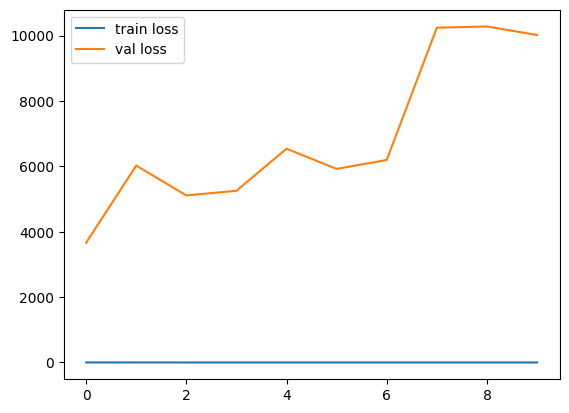

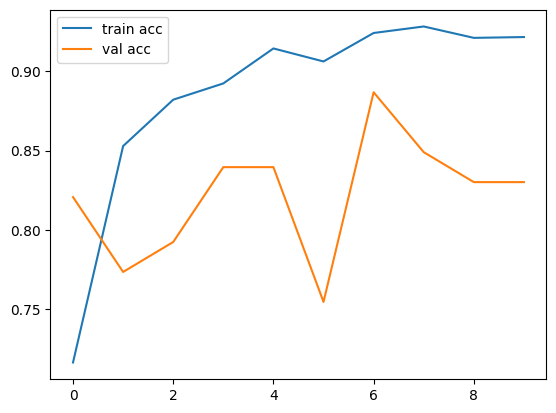

<Figure size 640x480 with 0 Axes>

In [41]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_VGG16.h5')

In [44]:

y_pred = model.predict(validation_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step


In [45]:

import numpy as np

np.argmax(y_pred, axis=1)

array([3, 3, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 1, 3, 3, 3, 3,
       1, 1, 1, 3, 0, 2, 3, 0, 0, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 0,
       2, 2, 2, 2, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3, 0, 0, 2, 3, 0, 2, 1, 3,
       3, 3, 0, 2, 2, 0, 0, 3, 0, 1, 2, 1, 3, 0, 0, 2, 3, 1, 3, 3, 3, 0,
       0, 0, 1, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model=load_model('model_VGG16.h5')

In [53]:
img=image.load_img('/kaggle/input/imagessss/1116130.jpg',target_size=(242,242))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
0
Predicted class: fresh cotton leaf


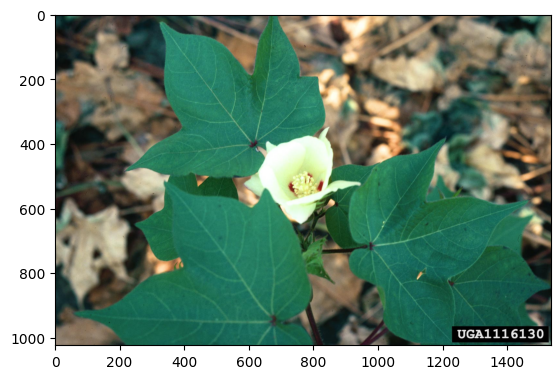

In [54]:
# Prediction code
model = load_model('model_VGG16.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(242, 242))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image array
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability
    return predicted_class_index

class_labels = {2: "diseased cotton leaf", 3: "diseased cotton plant", 0: "fresh cotton leaf", 1: "fresh cotton plant"}

img_path = '/kaggle/input/imagessss/1116130.jpg'  # Path to the image you want to predict
predicted_class_index = predict_image(img_path)

print(predicted_class_index)
predicted_class_label = class_labels[predicted_class_index]

plt.imshow(image.load_img(img_path))
print(f'Predicted class: {predicted_class_label}')